In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

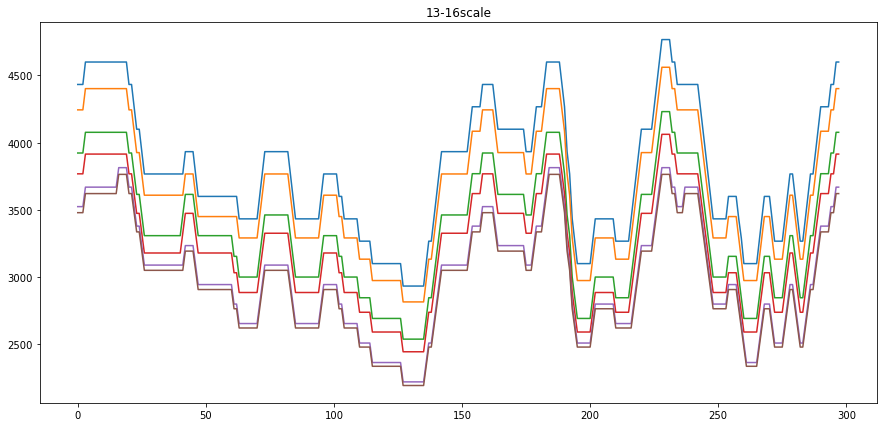

In [113]:

# 데이터셋 읽기
price_df = pd.read_csv('C:/Users/admin/Desktop/FINAL/닭고기데이터/닭고기시세20210101_20211231.csv', header=0, encoding='cp949')

# 데이터 정렬
price_df.loc[::-1].reset_index(drop=True, inplace=True)
# price_df.info()


# 각 컬럼을 plot
plt.figure(figsize=(15,7))
price_df['5-6scale'].plot(title='5-6scale')
price_df['7-8scale'].plot(title='7-8scale')
price_df['9-10scale'].plot(title='9-10scale')
price_df['11scale'].plot(title='11scale')
price_df['12scale'].plot(title='12scale')
price_df['13-16scale'].plot(title='13-16scale')
    
plt.show()

In [105]:
price_df.head()

,date,day,5-6scale,7-8scale,9-10scale,11scale,12scale,13-16scale
0,2021-01-02,Sat,4433,4244,3923,3768,3524,3479
1,2021-01-04,Mon,4433,4244,3923,3768,3524,3479
2,2021-01-05,Tue,4433,4244,3923,3768,3524,3479
3,2021-01-06,Wed,4600,4402,4077,3915,3669,3621
4,2021-01-07,Thr,4600,4402,4077,3915,3669,3621


In [91]:
price_df.isnull().sum()

date          0
day           0
5-6scale      0
7-8scale      0
9-10scale     0
11scale       0
12scale       0
13-16scale    0
dtype: int64

In [25]:
# 기온 데이터 전처리
temp = pd.read_csv('닭고기데이터/2021전국기온_수정.csv', encoding='euc-kr')
temp.drop(['지점'], axis=1, inplace=True)
temp.columns = ['date', 'avgtmp', 'lowtmp', 'hightmp']
temp.head()

,date,avgtmp,lowtmp,hightmp
0,2021-01-01,-3.4,-9.3,1.6
1,2021-01-02,-2.8,-6.9,1.4
2,2021-01-03,-3.3,-7.7,1.1
3,2021-01-04,-2.0,-8.1,3.9
4,2021-01-05,-2.2,-7.4,1.9


In [34]:
# 기온데이터 결측치 확인
temp.isnull().sum()

date       0
avgtmp     0
lowtmp     0
hightmp    0
dtype: int64

In [71]:
# 원유가격 데이터 호출 및 전처리
oil = pd.read_csv('닭고기데이터/국제_원유가격_2021년.csv', encoding='euc-kr')
oil.columns = ['date', 'oil_dubai', 'oil_brent', 'oil_WTI']
oil.head()

,date,oil_dubai,oil_brent,oil_WTI
0,2021-01-04,359.21,349.63,325.88
1,2021-01-05,344.03,365.15,340.15
2,2021-01-06,365.55,370.95,345.87
3,2021-01-07,372.69,371.73,347.46
4,2021-01-08,370.32,379.88,354.44


In [45]:
# 원유가격 데이터 결측치 확인
oil.isnull().sum()
oil[(oil['oil_dubai'].isnull()) | (oil['oil_WTI'].isnull())]

,date,oil_dubai,oil_brent,oil_WTI
10,2021-01-18,374.22,378.08,NaN
29,2021-02-12,NaN,438.23,417.45
30,2021-02-15,436.26,441.98,NaN
92,2021-05-13,NaN,473.82,450.99
101,2021-05-26,NaN,486.38,467.59
104,2021-05-31,476.90,486.59,NaN
129,2021-07-05,532.91,550.60,NaN
140,2021-07-20,NaN,499.76,485.85
154,2021-08-09,NaN,496.05,477.65
174,2021-09-06,509.08,525.30,NaN


In [60]:
oil['oil_dubai'][1]

344.03

In [80]:
# 결측치 발생한 지점을 위아래 값의 평균으로 대체
# interpolate함수 : 결측치를 앞뒤값의 평균으로 처리해주는 함수. 시계열데이터 결측치처리에 효과적.
oil.interpolate(inplace=True)
oil.isnull().sum()


date         0
oil_dubai    0
oil_brent    0
oil_WTI      0
dtype: int64

In [84]:
# 가축질병데이터 조회
dss_df = pd.read_excel()

,date,oil_dubai,oil_brent,oil_WTI
227,2021-11-18,585.60,604.81,588.210
228,2021-11-19,600.63,585.77,565.060
229,2021-11-22,583.76,593.29,571.330
230,2021-11-23,586.06,614.74,586.290
231,2021-11-24,612.15,615.07,586.200
232,2021-11-25,608.81,614.64,548.085
233,2021-11-26,579.04,544.17,509.970
234,2021-11-29,564.06,551.08,524.890
235,2021-11-30,539.56,529.72,496.770
236,2021-12-01,531.38,514.49,489.840
